In [1]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *
path = untar_data(URLs.PETS)
Path.BASE_PATH = path
path.ls()
(path/"images").ls()
fname = (path/"images").ls()[0]
re.findall(r'(.+)_\d+.jpg$', fname.name)

/home/mark/miniconda3/envs/py10/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['leonberger']

In [2]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

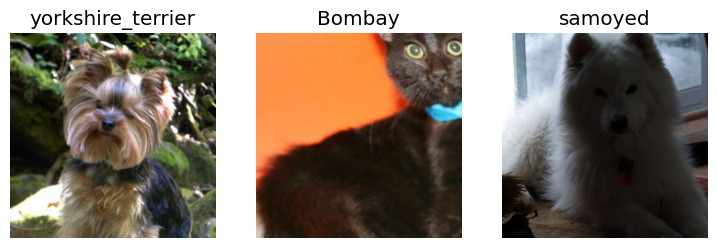

In [3]:
dls.show_batch(nrows=1, ncols=3)

In [4]:
pets.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/mark/.fastai/data/oxford-iiit-pet/images/chihuahua_150.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=287x300
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /home/mark/.fastai/data/oxford-iiit-pet/images/chihuahua_150.jpg
    applying partial gives
      chihuahua
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(17)

Final sample: (PILImage mode=RGB size=287x300, TensorCategory(17))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up a

In [13]:
torch.random.manual_seed(42);

acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [14]:
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [15]:
acts[:,0]

tensor([ 0.6734,  0.4689, -2.2457,  4.4164,  0.9233,  1.0698])

In [16]:
acts[:,1]

tensor([ 0.2576,  0.4607, -0.3727, -1.2760,  0.5347,  1.6187])

In [17]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [18]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

targ = tensor([0,1,0,1,1,0])

sm_acts

idx = range(6)
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [10]:
from IPython.display import HTML
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['result'] = sm_acts[range(6), targ]
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

/tmp/ipykernel_230975/1219388098.py:6: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  t = df.style.hide_index()


3,7,targ,idx,result
0.602469,0.397531,0,0,0.602469
0.502065,0.497935,1,1,0.497935
0.133188,0.866811,0,2,0.133188
0.996640,0.003360,1,3,0.003360
0.595949,0.404051,1,4,0.404051
0.366118,0.633882,0,5,0.366118


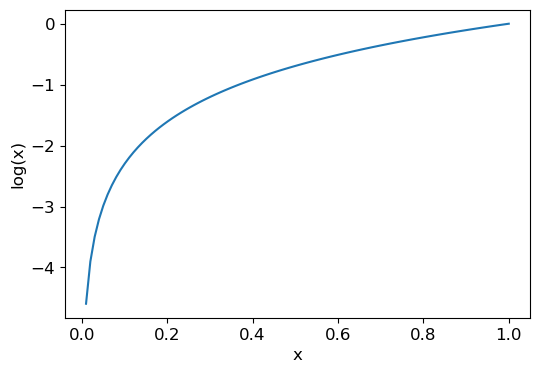

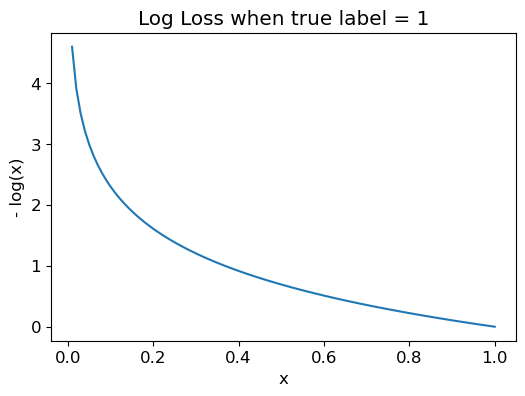

In [11]:
-sm_acts[idx, targ]

F.nll_loss(sm_acts, targ, reduction='none')

plot_function(torch.log, min=0,max=1, ty='log(x)', tx='x')

plot_function(lambda x: -1*torch.log(x), min=0,max=1, tx='x', ty='- log(x)', title = 'Log Loss when true label = 1')

In [12]:
#hide_input
from IPython.display import HTML
df['loss'] = -torch.log(tensor(df['result']))
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

/tmp/ipykernel_230975/3758383308.py:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  t = df.style.hide_index()


3,7,targ,idx,result,loss
0.602469,0.397531,0,0,0.602469,0.506720
0.502065,0.497935,1,1,0.497935,0.697285
0.133188,0.866811,0,2,0.133188,2.015990
0.996640,0.003360,1,3,0.003360,5.695763
0.595949,0.404051,1,4,0.404051,0.906213
0.366118,0.633882,0,5,0.366118,1.004798
